In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pl

In [ ]:
df=pd.read_csv("/content/data_sales (1).csv") #Reading the CSV file

In [ ]:
df

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method
0,Walmart,1128299,6/17/2021,Southeast,Florida,Orlando,Women's Apparel,$103.00,218,"2,245","$1,257",Online
1,West Gear,1128299,7/16/2021,South,Louisiana,New Orleans,Women's Apparel,$103.00,163,"1,679",$806,Online
2,Sports Direct,1197831,8/25/2021,South,Alabama,Birmingham,Men's Street Footwear,$10.00,700,"7,000","$3,150",Outlet
3,Sports Direct,1197831,8/27/2021,South,Alabama,Birmingham,Women's Street Footwear,$15.00,575,"8,625","$3,881",Outlet
4,Sports Direct,1197831,8/21/2021,South,Alabama,Birmingham,Women's Street Footwear,$15.00,475,"7,125","$3,206",Outlet
...,...,...,...,...,...,...,...,...,...,...,...,...
9636,Amazon,1185732,11/18/2021,Northeast,Maine,Portland,Men's Apparel,$65.00,150,"9,750","$2,438",Outlet
9637,Amazon,1185732,10/22/2021,West,Alaska,Anchorage,Women's Athletic Footwear,$65.00,150,"9,750","$2,438",Outlet
9638,Amazon,1185732,10/22/2021,West,Alaska,Anchorage,Men's Apparel,$75.00,150,"11,250","$2,813",Outlet
9639,West Gear,1185732,4/10/2021,Midwest,Indiana,Indianapolis,Men's Apparel,$65.00,150,"9,750","$2,925",In-store


Data Cleaning


In [ ]:
df.isnull().sum() #Checking For Null Values

,0
Retailer,0
Retailer ID,0
Invoice Date,0
Region,0
State,0
City,0
Product,0
Price per Unit,2
Units Sold,0
Total Sales,0


In [ ]:
df['Price per Unit']=df['Price per Unit'].fillna(0) #Filling Missing Values with 0

In [ ]:
df.isnull().sum()

,0
Retailer,0
Retailer ID,0
Invoice Date,0
Region,0
State,0
City,0
Product,0
Price per Unit,0
Units Sold,0
Total Sales,0


In [ ]:
df.duplicated().sum() #Checking for Duplicate Values

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9641 entries, 0 to 9640
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9641 non-null   object
 1   Retailer ID       9641 non-null   int64 
 2   Invoice Date      9641 non-null   object
 3   Region            9641 non-null   object
 4   State             9641 non-null   object
 5   City              9641 non-null   object
 6   Product           9641 non-null   object
 7   Price per Unit    9641 non-null   object
 8   Units Sold        9641 non-null   object
 9   Total Sales       9641 non-null   object
 10  Operating Profit  9641 non-null   object
 11  Sales Method      9641 non-null   object
dtypes: int64(1), object(11)
memory usage: 904.0+ KB


In [ ]:
df['Price per Unit'] =df['Price per Unit'].str.replace('$','').astype(float) #Converting dtype to float and replacing $,''

In [ ]:
df['Price per Unit'] = df['Price per Unit']*87.08 #Converting Dollar to Indian Rupee

In [ ]:
df

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method
0,Walmart,1128299,6/17/2021,Southeast,Florida,Orlando,Women's Apparel,8969.24,218,"2,245","$1,257",Online
1,West Gear,1128299,7/16/2021,South,Louisiana,New Orleans,Women's Apparel,8969.24,163,"1,679",$806,Online
2,Sports Direct,1197831,8/25/2021,South,Alabama,Birmingham,Men's Street Footwear,870.80,700,"7,000","$3,150",Outlet
3,Sports Direct,1197831,8/27/2021,South,Alabama,Birmingham,Women's Street Footwear,1306.20,575,"8,625","$3,881",Outlet
4,Sports Direct,1197831,8/21/2021,South,Alabama,Birmingham,Women's Street Footwear,1306.20,475,"7,125","$3,206",Outlet
...,...,...,...,...,...,...,...,...,...,...,...,...
9636,Amazon,1185732,11/18/2021,Northeast,Maine,Portland,Men's Apparel,5660.20,150,"9,750","$2,438",Outlet
9637,Amazon,1185732,10/22/2021,West,Alaska,Anchorage,Women's Athletic Footwear,5660.20,150,"9,750","$2,438",Outlet
9638,Amazon,1185732,10/22/2021,West,Alaska,Anchorage,Men's Apparel,6531.00,150,"11,250","$2,813",Outlet
9639,West Gear,1185732,4/10/2021,Midwest,Indiana,Indianapolis,Men's Apparel,5660.20,150,"9,750","$2,925",In-store


In [ ]:
df['Units Sold']=df['Units Sold'].str.replace(',','').astype(int) #Replacing ',' with spaces for Units Sold

In [ ]:
df['Total Sales']=df['Total Sales'].str.replace(',','').astype(int) #Replacing ',' with spaces for Total Sales

In [ ]:
df

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method
0,Walmart,1128299,6/17/2021,Southeast,Florida,Orlando,Women's Apparel,8969.24,218,2245,"$1,257",Online
1,West Gear,1128299,7/16/2021,South,Louisiana,New Orleans,Women's Apparel,8969.24,163,1679,$806,Online
2,Sports Direct,1197831,8/25/2021,South,Alabama,Birmingham,Men's Street Footwear,870.80,700,7000,"$3,150",Outlet
3,Sports Direct,1197831,8/27/2021,South,Alabama,Birmingham,Women's Street Footwear,1306.20,575,8625,"$3,881",Outlet
4,Sports Direct,1197831,8/21/2021,South,Alabama,Birmingham,Women's Street Footwear,1306.20,475,7125,"$3,206",Outlet
...,...,...,...,...,...,...,...,...,...,...,...,...
9636,Amazon,1185732,11/18/2021,Northeast,Maine,Portland,Men's Apparel,5660.20,150,9750,"$2,438",Outlet
9637,Amazon,1185732,10/22/2021,West,Alaska,Anchorage,Women's Athletic Footwear,5660.20,150,9750,"$2,438",Outlet
9638,Amazon,1185732,10/22/2021,West,Alaska,Anchorage,Men's Apparel,6531.00,150,11250,"$2,813",Outlet
9639,West Gear,1185732,4/10/2021,Midwest,Indiana,Indianapolis,Men's Apparel,5660.20,150,9750,"$2,925",In-store


In [ ]:
df['Operating Profit']=df['Operating Profit'].str.replace(',','') #Replacing ',' with spaces for Operating Profit

In [ ]:
df['Operating Profit'] =df['Operating Profit'].str.replace('$','').astype(int) #Replacing '$' with spaces for Operating Profit

In [ ]:
df['Operating Profit'] = round(df['Price per Unit']*87.08) #Converting Dollar to Indian Rupee

In [ ]:
df['Invoice Date']=pd.to_datetime(df['Invoice Date'],errors='coerce') #Converting dtype to DateTime

In [ ]:
df

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method
0,Walmart,1128299,2021-06-17,Southeast,Florida,Orlando,Women's Apparel,8969.24,218,2245,781041.0,Online
1,West Gear,1128299,2021-07-16,South,Louisiana,New Orleans,Women's Apparel,8969.24,163,1679,781041.0,Online
2,Sports Direct,1197831,2021-08-25,South,Alabama,Birmingham,Men's Street Footwear,870.80,700,7000,75829.0,Outlet
3,Sports Direct,1197831,2021-08-27,South,Alabama,Birmingham,Women's Street Footwear,1306.20,575,8625,113744.0,Outlet
4,Sports Direct,1197831,2021-08-21,South,Alabama,Birmingham,Women's Street Footwear,1306.20,475,7125,113744.0,Outlet
...,...,...,...,...,...,...,...,...,...,...,...,...
9636,Amazon,1185732,2021-11-18,Northeast,Maine,Portland,Men's Apparel,5660.20,150,9750,492890.0,Outlet
9637,Amazon,1185732,2021-10-22,West,Alaska,Anchorage,Women's Athletic Footwear,5660.20,150,9750,492890.0,Outlet
9638,Amazon,1185732,2021-10-22,West,Alaska,Anchorage,Men's Apparel,6531.00,150,11250,568719.0,Outlet
9639,West Gear,1185732,2021-04-10,Midwest,Indiana,Indianapolis,Men's Apparel,5660.20,150,9750,492890.0,In-store


In [ ]:
df['Year']=df['Invoice Date'].dt.year #Extracting the year

In [ ]:
df['Month']=df['Invoice Date'].dt.month_name() #Extracting the month name

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9641 entries, 0 to 9640
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9641 non-null   object        
 1   Retailer ID       9641 non-null   int64         
 2   Invoice Date      9641 non-null   datetime64[ns]
 3   Region            9641 non-null   object        
 4   State             9641 non-null   object        
 5   City              9641 non-null   object        
 6   Product           9641 non-null   object        
 7   Price per Unit    9639 non-null   float64       
 8   Units Sold        9641 non-null   int64         
 9   Total Sales       9641 non-null   int64         
 10  Operating Profit  9639 non-null   float64       
 11  Sales Method      9641 non-null   object        
 12  Year              9641 non-null   int32         
 13  Month             9641 non-null   object        
dtypes: datetime64[ns](1), fl

In [ ]:
df

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method,Year,Month
0,Walmart,1128299,2021-06-17,Southeast,Florida,Orlando,Women's Apparel,8969.24,218,2245,781041.0,Online,2021,June
1,West Gear,1128299,2021-07-16,South,Louisiana,New Orleans,Women's Apparel,8969.24,163,1679,781041.0,Online,2021,July
2,Sports Direct,1197831,2021-08-25,South,Alabama,Birmingham,Men's Street Footwear,870.80,700,7000,75829.0,Outlet,2021,August
3,Sports Direct,1197831,2021-08-27,South,Alabama,Birmingham,Women's Street Footwear,1306.20,575,8625,113744.0,Outlet,2021,August
4,Sports Direct,1197831,2021-08-21,South,Alabama,Birmingham,Women's Street Footwear,1306.20,475,7125,113744.0,Outlet,2021,August
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9636,Amazon,1185732,2021-11-18,Northeast,Maine,Portland,Men's Apparel,5660.20,150,9750,492890.0,Outlet,2021,November
9637,Amazon,1185732,2021-10-22,West,Alaska,Anchorage,Women's Athletic Footwear,5660.20,150,9750,492890.0,Outlet,2021,October
9638,Amazon,1185732,2021-10-22,West,Alaska,Anchorage,Men's Apparel,6531.00,150,11250,568719.0,Outlet,2021,October
9639,West Gear,1185732,2021-04-10,Midwest,Indiana,Indianapolis,Men's Apparel,5660.20,150,9750,492890.0,In-store,2021,April


In [ ]:
# Calculating profit margin for each transaction
df['Profit Margin'] = (df['Operating Profit'] / df['Total Sales']) * 100

In [ ]:
df['Profit Margin'].value_counts()

,count
Profit Margin,
2527.644444,57
3370.192593,53
1784.219608,51
1895.733333,50
2333.210256,49
...,...
49595.697074,1
49575.322284,1
49502.670623,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9641 entries, 0 to 9640
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9641 non-null   object        
 1   Retailer ID       9641 non-null   int64         
 2   Invoice Date      9641 non-null   datetime64[ns]
 3   Region            9641 non-null   object        
 4   State             9641 non-null   object        
 5   City              9641 non-null   object        
 6   Product           9641 non-null   object        
 7   Price per Unit    9639 non-null   float64       
 8   Units Sold        9641 non-null   int64         
 9   Total Sales       9641 non-null   int64         
 10  Operating Profit  9639 non-null   float64       
 11  Sales Method      9641 non-null   object        
 12  Year              9641 non-null   int32         
 13  Month             9641 non-null   object        
 14  Profit Margin     9639 n

In [ ]:
df['Month Date']=df['Invoice Date'].dt.month #Extracting the month in terms of numbers

In [ ]:
df.to_csv("Cleanedadidas.csv") #Downloading the cleaned dataset

In [ ]:
df

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method,Year,Month,Profit Margin,Month Date
0,Walmart,1128299,2021-06-17,Southeast,Florida,Orlando,Women's Apparel,8969.24,218,2245,781041.0,Online,2021,June,34790.244989,6
1,West Gear,1128299,2021-07-16,South,Louisiana,New Orleans,Women's Apparel,8969.24,163,1679,781041.0,Online,2021,July,46518.225134,7
2,Sports Direct,1197831,2021-08-25,South,Alabama,Birmingham,Men's Street Footwear,870.80,700,7000,75829.0,Outlet,2021,August,1083.271429,8
3,Sports Direct,1197831,2021-08-27,South,Alabama,Birmingham,Women's Street Footwear,1306.20,575,8625,113744.0,Outlet,2021,August,1318.771014,8
4,Sports Direct,1197831,2021-08-21,South,Alabama,Birmingham,Women's Street Footwear,1306.20,475,7125,113744.0,Outlet,2021,August,1596.407018,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9636,Amazon,1185732,2021-11-18,Northeast,Maine,Portland,Men's Apparel,5660.20,150,9750,492890.0,Outlet,2021,November,5055.282051,11
9637,Amazon,1185732,2021-10-22,West,Alaska,Anchorage,Women's Athletic Footwear,5660.20,150,9750,492890.0,Outlet,2021,October,5055.282051,10
9638,Amazon,1185732,2021-10-22,West,Alaska,Anchorage,Men's Apparel,6531.00,150,11250,568719.0,Outlet,2021,October,5055.280000,10
9639,West Gear,1185732,2021-04-10,Midwest,Indiana,Indianapolis,Men's Apparel,5660.20,150,9750,492890.0,In-store,2021,April,5055.282051,4


#EDA

#Product with highest avg units sold

In [ ]:
avg_unit=df.groupby('Product')['Units Sold'].mean().sort_values(ascending=False).head(5)
avg_unit

,Units Sold
Product,
Men's aparel,900.000000
Men's Street Footwear,368.521739
Men's Athletic Footwear,270.180970
Women's Apparel,269.525202
Women's Street Footwear,243.738481


<ipython-input-31-89be7c8f72af>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_unit.index,y=avg_unit.values,palette="viridis")


Text(0.5, 1.0, 'Product with Highest Avg Units Sold')

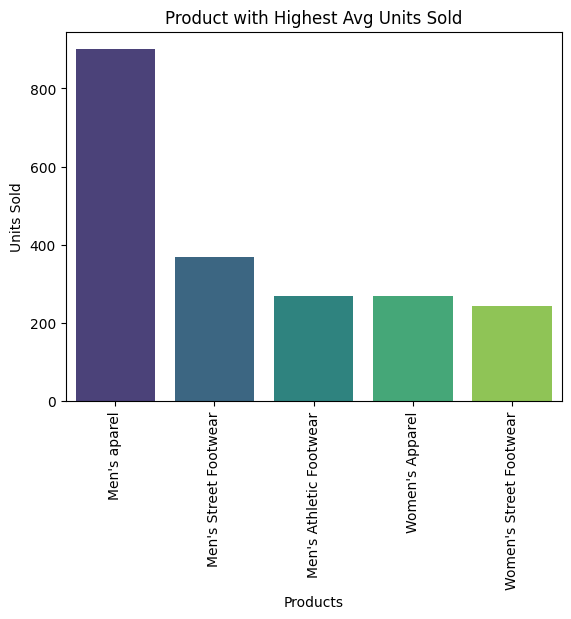

In [ ]:
sns.barplot(x=avg_unit.index,y=avg_unit.values,palette="viridis")
plt.xticks(rotation=90)
plt.xlabel('Products')
plt.ylabel('Units Sold')
plt.title('Product with Highest Avg Units Sold')



###**Documentation**-From the above bar plot we can see that the products with the highest units sold is Men's Aparel and the products with lowest units sold is Womens Street Wear.

#Top 5 Products with Highest Total Sales


In [ ]:
total_product=df.groupby('Product')['Total Sales'].sum().sort_values(ascending=False).head(5).reset_index()
pl.bar(total_product,x='Product',y='Total Sales',color='Product',hover_data='Total Sales',title='Top 5 Products with Highest Total Sales')


###**Documentation**-From the above bar chart we can see that top 5 products with highest total sales are Mens Street Footwear & Womens Apparel .

#Total Sales by Year

In [ ]:
year_sal=df.groupby('Year')['Total Sales'].sum().sort_values(ascending=False).head(5)

In [ ]:
fig = pl.pie(
    values=year_sal.values,
    names=year_sal.index,
    color=year_sal.index.astype(str),  # Convert index to string for color mapping
    color_discrete_map={'2020': 'RoyalBlue', '2021': 'DarkBlue'},
    title="Sales Distribution by Year"
)
fig

###**Documentation**-From the above Pie Chart we can see the Total Sales Distribution over the years 2020 and 2021 where Sales Percentage was higher i.e 79.91% in year 2021 and lowest i.e 20.1% in year 2020.

#Total Sales By Month

In [ ]:
month_sal=df.groupby('Month')['Total Sales'].sum().sort_values(ascending=True).reset_index()
month_sal

,Month,Total Sales
0,March,5680937
1,February,6110037
2,October,6391117
3,November,6785744
4,January,7112187
5,April,7234017
6,June,7454756
7,September,7766164
8,May,8050788
9,December,8528218


In [ ]:
pl.line(month_sal,x='Month',y='Total Sales',markers=True,title='Total Sales By Month')

###**Documentation**-From the above Line Graph we can analyze that the sales where comparatively higher in month of July and August and the sales dropped in month of March,february and October.

#Total Units Sold By Sales Method

In [ ]:
tot_method=df.groupby('Sales Method')['Units Sold'].mean().sort_values(ascending=False).head(5).reset_index()
tot_method

,Sales Method,Units Sold
0,In-store,396.545977
1,Outlet,281.051793
2,Online,192.082839


In [ ]:
pl.bar(tot_method,x='Units Sold',y='Sales Method',color='Sales Method')

###**Documentation**-From the above Horizontal Bar Chart we can see that Units that are sold the most are In-store and least units sold where through only online website.

#Total Operating Profit Based on Retailer

In [ ]:
operating_prof=df.groupby('Retailer')['Operating Profit'].sum().sort_values(ascending=False).reset_index()
operating_prof

,Retailer,Operating Profit
0,Foot Locker,894087662.0
1,West Gear,840271671.0
2,Sports Direct,647005597.0
3,Amazon,350884739.0
4,Kohl's,348412741.0
5,Walmart,223976906.0


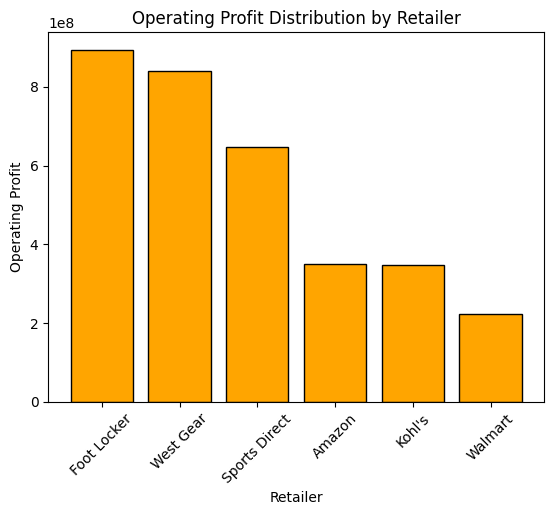

In [ ]:
plt.bar(operating_prof["Retailer"], operating_prof["Operating Profit"], edgecolor="black",color="Orange")

plt.xticks(rotation=45)  # Rotate retailer names for better visibility
plt.ylabel("Operating Profit")
plt.xlabel("Retailer")
plt.title("Operating Profit Distribution by Retailer")

plt.show()

###**Documentation**-From the above Bar chart we can see that the Retailer that has the highest operating profit is Foot Locker,West Gear and Sports Direct whereas the retailer with least Operating Profit is Walmart.

#Total Sales Based on Retailer

In [ ]:
sal_retail=df.groupby('Retailer')['Total Sales'].sum().sort_values(ascending=False).head()
sal_retail

,Total Sales
Retailer,
West Gear,24204740
Foot Locker,21989528
Sports Direct,18188531
Kohl's,10211506
Amazon,7769912


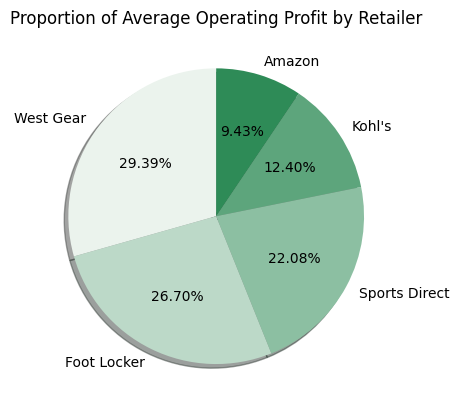

In [ ]:
plt.pie(sal_retail.values,labels=sal_retail.index, autopct='%1.2f%%', colors=sns.light_palette("seagreen", n_colors=len(sal_retail)), shadow=True, startangle=90)
plt.title('Proportion of Average Operating Profit by Retailer')
plt.show()

###**Documentation**-From the above Pie Chart we can see the distribution of Total Sales Based on Retailer.The Retailer with highest Total Sales is West Gear and Retailer with least total sales is Amazon

#Top 5 regions with the highest average operating profit.

In [ ]:
regions=df.groupby('Region')['Operating Profit'].mean().sort_values(ascending=False).head()
regions

,Operating Profit
Region,
Southeast,380534.044118
West,378560.401881
Northeast,354015.686737
Midwest,306027.269128
South,289944.742609


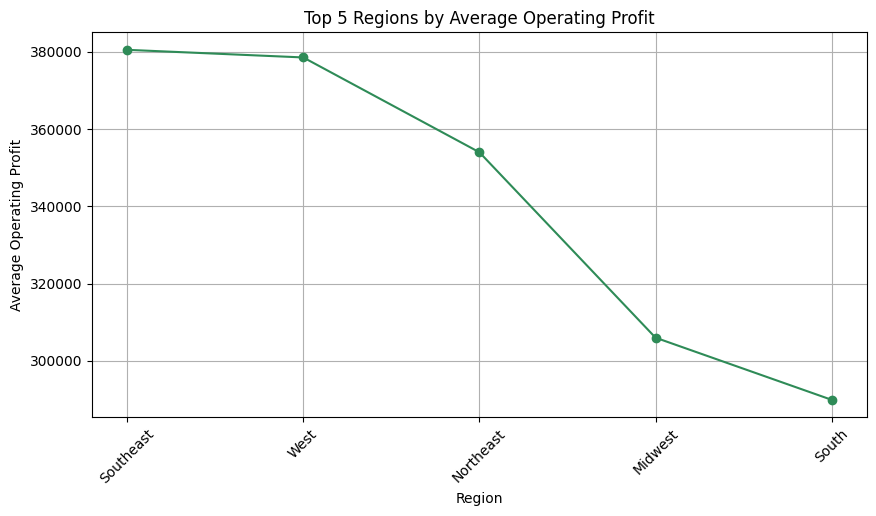

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(regions.index, regions.values, marker="o", linestyle="-", color="seagreen")

plt.xlabel("Region")
plt.ylabel("Average Operating Profit")
plt.title("Top 5 Regions by Average Operating Profit")
plt.xticks(rotation=45)

plt.grid(True)
plt.show()

###**Documentation**-From the above Line Chart we can analyze that the region with the highest operating profit is Southeast whereas the region with the least operating profit is South Region

#States Wise Total Sales

In [ ]:
state_sales=df.groupby('State')['Total Sales'].sum().sort_values(ascending=False).head(10).reset_index()
state_sales


,State,Total Sales
0,New York,6422918
1,Florida,5928380
2,California,5925674
3,Texas,4577359
4,South Carolina,2928565
5,Washington,2633075
6,North Carolina,2395657
7,Louisiana,2375082
8,Hawaii,2228245
9,Virginia,2157510


In [ ]:
fig = pl.bar(state_sales,
             x='State',
             y='Total Sales',
             title="Top 10 States by Total Sales",
             text_auto=True,
             color="Total Sales",
             color_continuous_scale="Spectral"
           )

fig.update_layout(xaxis_title="State",
                  yaxis_title="Total Sales",
                  xaxis_tickangle=-45)

fig.show()

###**Documentation**-From the above Bar Chart we can analyze that the state with highest Total Sales is New York, Florida, California.

#Average Profit Margins By Products

In [ ]:
avg_prof=df.groupby('Product')['Profit Margin'].sum().sort_values(ascending=False).head(10)
avg_prof

,Profit Margin
Product,
Women's Athletic Footwear,inf
Men's Apparel,1.084119e+08
Women's Street Footwear,7.729720e+07
Men's Athletic Footwear,6.866332e+07
Women's Apparel,6.448416e+07
Men's Street Footwear,4.321505e+07
Men's aparel,8.425481e+02


#Total Units Sold per Region

In [ ]:
unitregion=df.groupby("Region")["Units Sold"].sum().reset_index()
unitregion

,Region,Units Sold
0,Midwest,390887
1,Northeast,501279
2,South,490710
3,Southeast,407000
4,West,685735


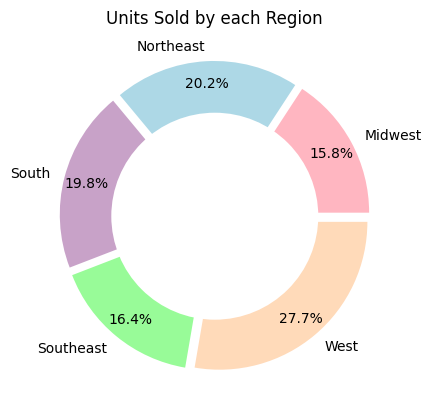

In [ ]:
# Colors
colors = ['#FFB6C1', '#ADD8E6', '#C8A2C8', '#98FB98', '#FFDAB9']

# Explosion
explode = (0.05, 0.05, 0.05, 0.05, 0.05)

# Pie Chart
plt.pie(unitregion["Units Sold"], colors=colors, labels=unitregion["Region"],
        autopct='%1.1f%%', pctdistance=0.85, explode=explode)

# Draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('Units Sold by each Region')

# Displaying Chart
plt.show()

###**Documentation**-From the above Donut Chart we can see that highest units sold are in West Region.

#Sales Method Preference per Retailer

In [ ]:
df.groupby(["Retailer", "Sales Method"])["Total Sales"].sum().reset_index()


,Retailer,Sales Method,Total Sales
0,Amazon,In-store,2236625
1,Amazon,Online,2890986
2,Amazon,Outlet,2642301
3,Foot Locker,In-store,7652500
4,Foot Locker,Online,7294363
5,Foot Locker,Outlet,7042665
6,Kohl's,In-store,2956625
7,Kohl's,Online,3099247
8,Kohl's,Outlet,4155634
9,Sports Direct,In-store,5504850


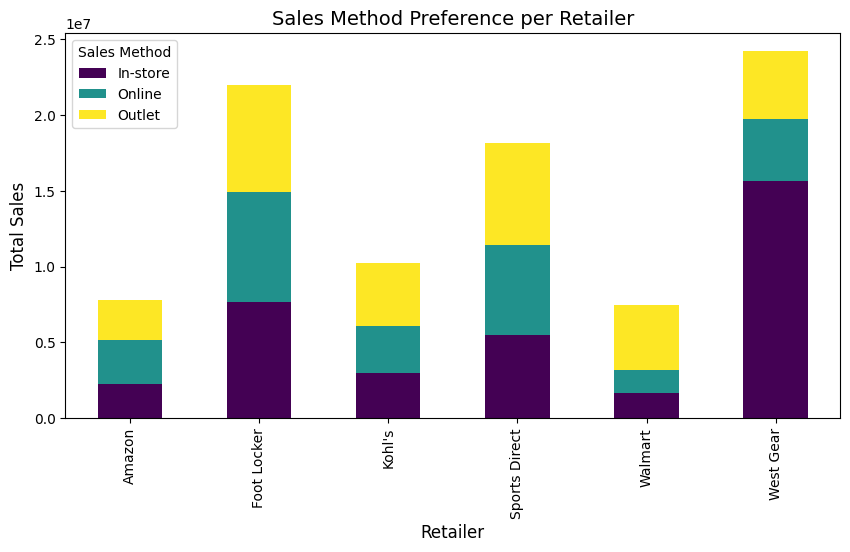

In [ ]:
# Sample DataFrame (replace with your actual df)
df_grouped = df.groupby(["Retailer", "Sales Method"])["Total Sales"].sum().reset_index()

# Pivot the data for stacked bar chart
df_pivot = df_grouped.pivot(index="Retailer", columns="Sales Method", values="Total Sales")

# Plot stacked bar chart
df_pivot.plot(kind="bar", stacked=True, figsize=(10, 5), colormap="viridis")

# Formatting the plot
plt.title("Sales Method Preference per Retailer", fontsize=14)
plt.xlabel("Retailer", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)

plt.legend(title="Sales Method")

# Show the plot
plt.show()


###**Documentation**-From the above stacked bar chart we can see the distrubtion of Payment Methods across different Retailers and which retailers prefer which all payment methods.

#Top 5 Cities with highest Total Sales Vs Bottom 5 Cities with least Sales

In [ ]:


top5city=df.groupby('City')['Total Sales'].sum().sort_values(ascending=False).head(5).reset_index()
top5city


,City,Total Sales
0,Charleston,3997485
1,New York,3980134
2,San Francisco,3362174
3,Miami,3160090
4,Portland,3054564


In [ ]:
bott5city=df.groupby('City')['Total Sales'].sum().sort_values(ascending=True).head(5).reset_index()
bott5city


,City,Total Sales
0,Omaha,592907
1,Minneapolis,737807
2,Des Moines,742403
3,Milwaukee,772751
4,Fargo,773557


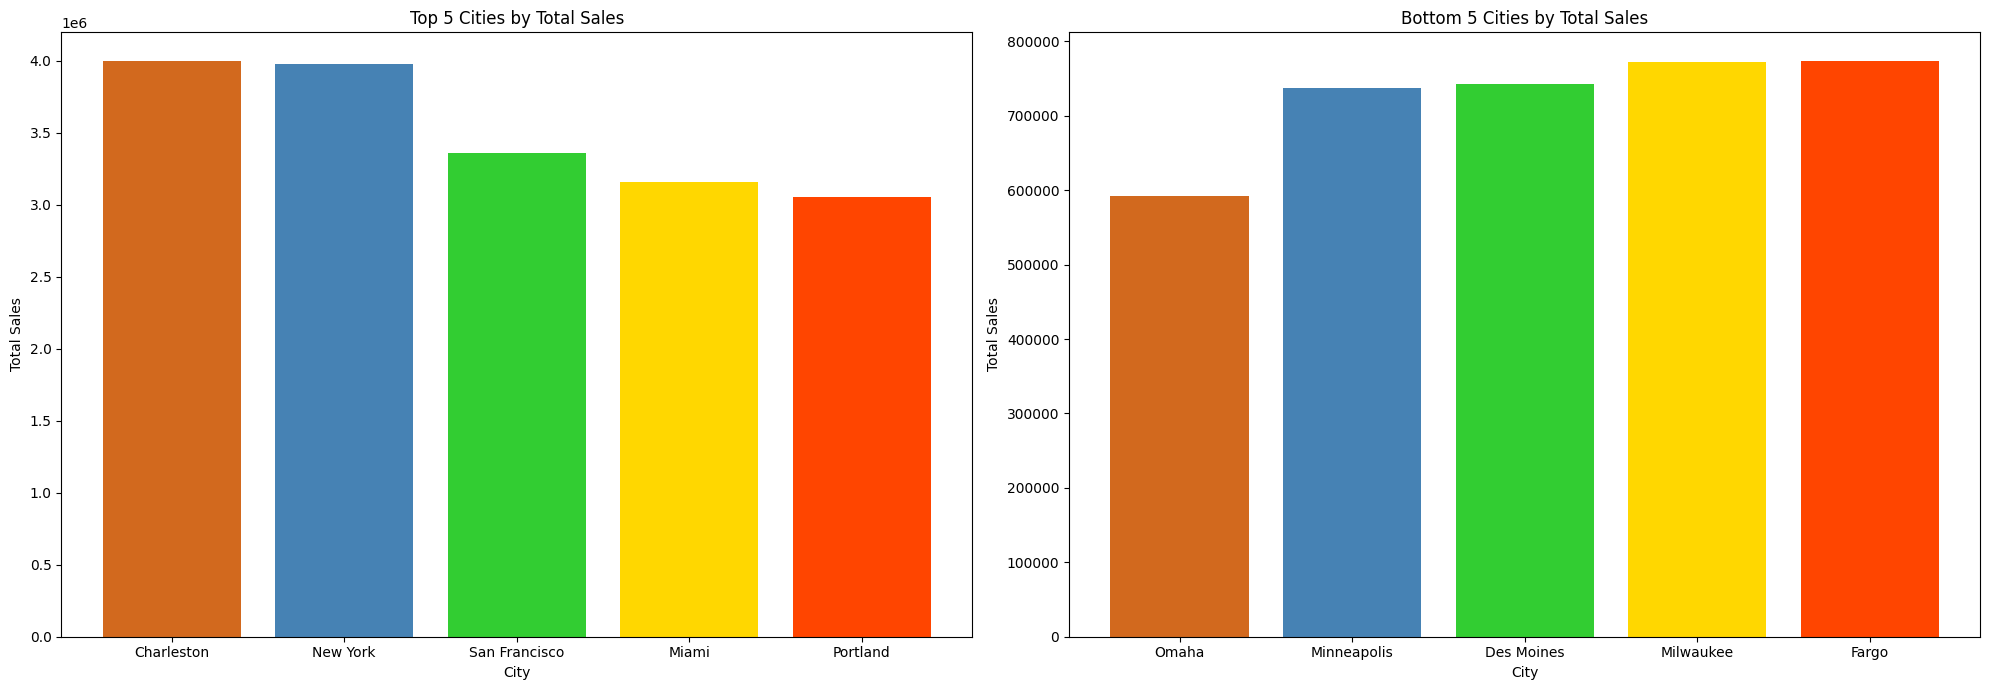

In [ ]:
# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

# Plotting Top 5 Cities
axes[0].bar(top5city['City'], top5city["Total Sales"], color=['#D2691E', '#4682B4', '#32CD32', '#FFD700', '#FF4500'])
axes[0].set_title('Top 5 Cities by Total Sales')
axes[0].set_xlabel('City')
axes[0].set_ylabel('Total Sales')

# Plotting Bottom 5 Cities
axes[1].bar(bott5city["City"], bott5city["Total Sales"], color=['#D2691E', '#4682B4', '#32CD32', '#FFD700', '#FF4500'])
axes[1].set_title('Bottom 5 Cities by Total Sales')
axes[1].set_xlabel('City')
axes[1].set_ylabel('Total Sales')

# Adjust layout
plt.tight_layout()
plt.show()


###**Documentation**-From the above Sub plot we can see the comparison of top and bottom 5 city sales based on Total Sales from them Birmingham City has the Highest Total Sales and New Orieans has lowest total sales

#Product Performance by City

In [ ]:
city_prod=df.groupby(["City", "Product"])["Total Sales"].sum().reset_index()
city_prod

,City,Product,Total Sales
0,Albany,Men's Apparel,387356
1,Albany,Men's Athletic Footwear,382960
2,Albany,Men's Street Footwear,577400
3,Albany,Women's Apparel,477910
4,Albany,Women's Athletic Footwear,297302
...,...,...,...
308,Wilmington,Men's Athletic Footwear,188417
309,Wilmington,Men's Street Footwear,352222
310,Wilmington,Women's Apparel,252041
311,Wilmington,Women's Athletic Footwear,124259


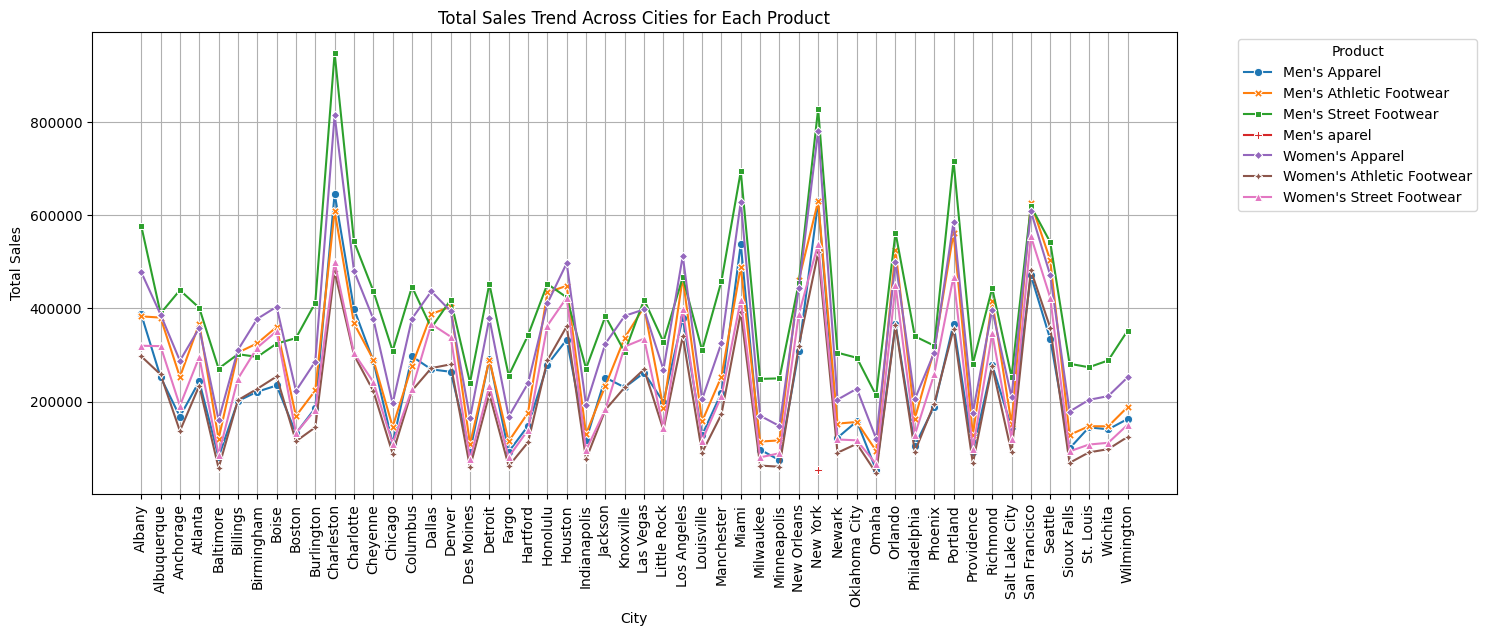

In [ ]:
# Pivot the table for line plot
line_data = city_prod.pivot(index="City", columns="Product", values="Total Sales")

# Plot line chart
plt.figure(figsize=(14, 6))
sns.lineplot(data=line_data, markers=True, dashes=False)

plt.title("Total Sales Trend Across Cities for Each Product")
plt.xlabel("City")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.legend(title="Product", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()

#Price Per Unit Analysis

In [ ]:
df.groupby("Product")["Price per Unit"].mean().reset_index()


,Product,Price per Unit
0,Men's Apparel,4380.743670
1,Men's Athletic Footwear,3812.186940
2,Men's Street Footwear,3852.127130
3,Men's aparel,5224.800000
4,Women's Apparel,4491.854088
5,Women's Athletic Footwear,3580.154492
6,Women's Street Footwear,3505.485106


# Invoice Frequency

In [ ]:
df["Invoice Date"].value_counts().head(5)


,count
Invoice Date,
2021-01-17,77
2021-08-17,72
2021-04-17,72
2021-03-16,72
2021-11-17,71


#Weekday vs. Weekend Sales

In [ ]:
df["Invoice Date"] = pd.to_datetime(df["Invoice Date"])
df["Weekday"] = df["Invoice Date"].dt.day_name()
weeksd=df.groupby("Weekday")["Total Sales"].sum().reset_index()
weeksd

,Weekday,Total Sales
0,Friday,14668345
1,Monday,11174196
2,Saturday,11758048
3,Sunday,11985820
4,Thursday,14568325
5,Tuesday,13713841
6,Wednesday,11951492


Text(0, 0.5, 'Total Sales')

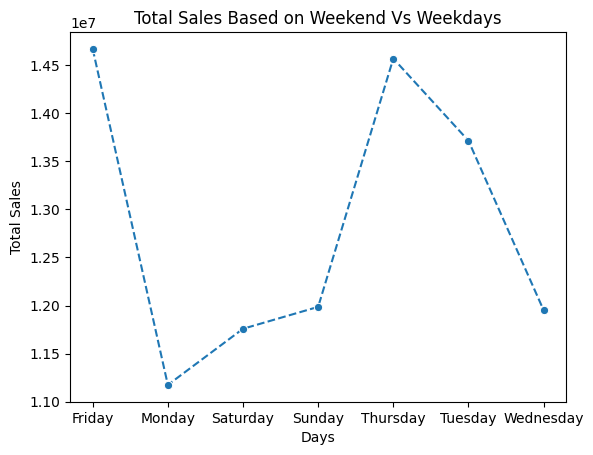

In [ ]:
sns.lineplot(weeksd,x='Weekday',y='Total Sales',marker='o',linestyle='--')
plt.title("Total Sales Based on Weekend Vs Weekdays")
plt.xlabel("Days")
plt.ylabel("Total Sales")

#Total Sales vs operating profit

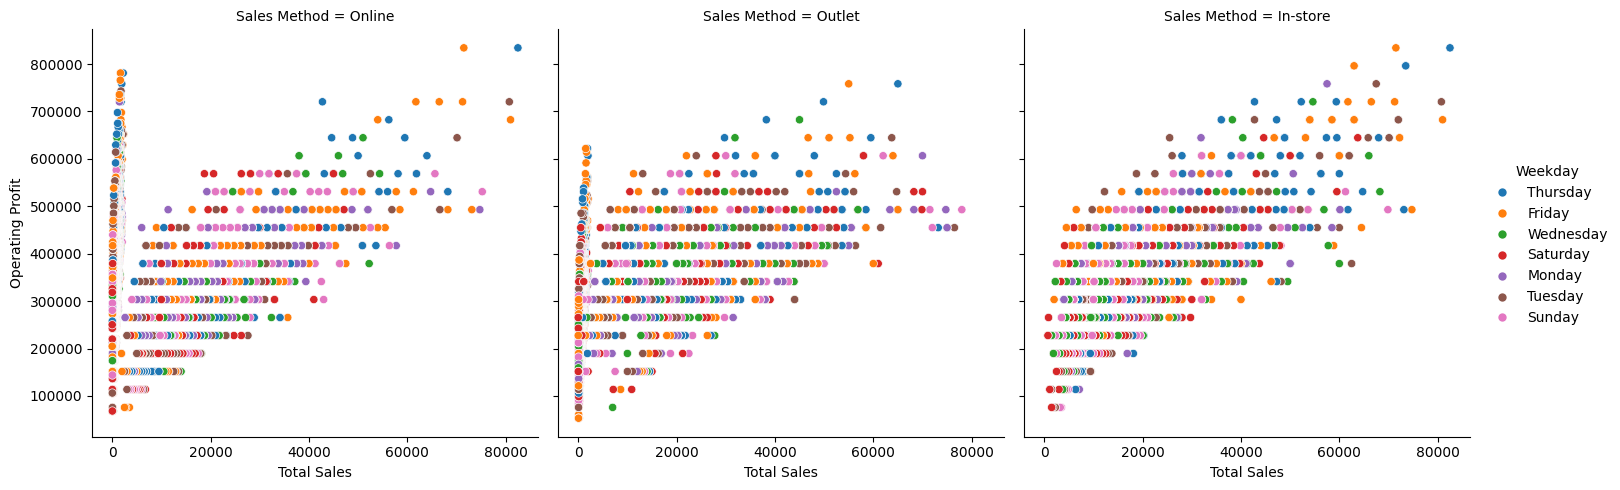

In [ ]:
sns.relplot(data=df,x='Total Sales',y='Operating Profit',kind='scatter',col='Sales Method',hue='Weekday')

# Scatter Plot: Total Sales vs. Units Sold

In [ ]:
pl.scatter(df, x="Units Sold", y="Total Sales",color='Product',hover_name='City',size='Year')


#Distribution Of Operating Profit

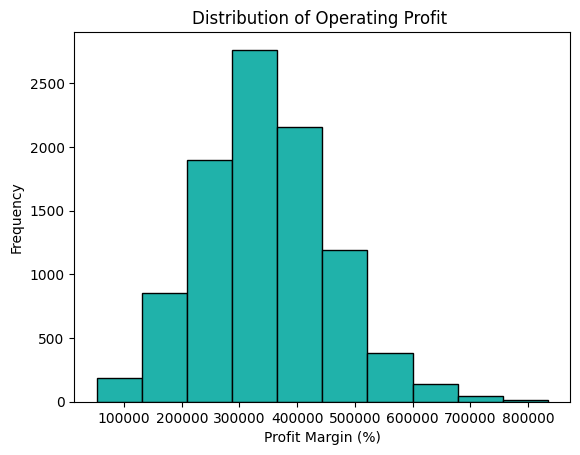

In [ ]:
plt.hist(df['Operating Profit'], bins=10, color='#20B2AA', edgecolor='black')

plt.title('Distribution of Operating Profit ')
plt.xlabel('Profit Margin (%)')
plt.ylabel('Frequency')

plt.show()